In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import collections
from google.colab import auth
   
   
auth.authenticate_user()
df = pd.read_csv('insurance.csv', na_values=['NA','?'])
df = df.drop(['children','region','sex','smoker'], axis = 1)
numInstances = 200
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)



df


,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Root mean squared error = 0.2095
R-squared = 0.0320
Slope =  0.19256744
Intercept =  0.10227376


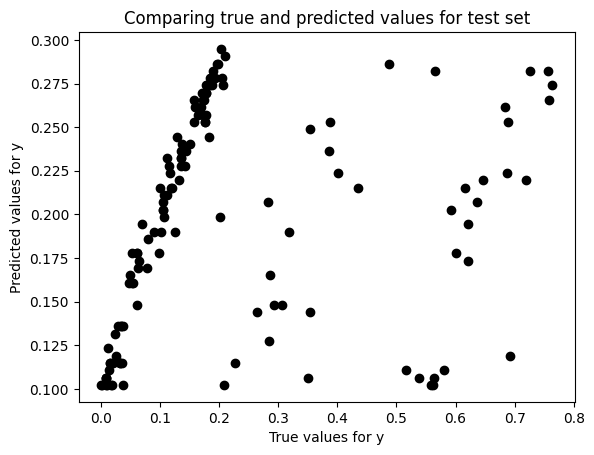

In [9]:

normalize_numeric_minmax(df, "age")
normalize_numeric_minmax(df, "charges")
X = df[['age']]
Y = df[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=200)

insurance_reg = linear_model.LinearRegression()

insurance_reg.fit(X_train, y_train)

y_pred_test = insurance_reg.predict(X_test)

plt.scatter(y_test,y_pred_test, color = 'black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))
print('Slope = ', insurance_reg.coef_[0][0])
print('Intercept = ', insurance_reg.intercept_[0])



Text(0, 0.5, 'y')

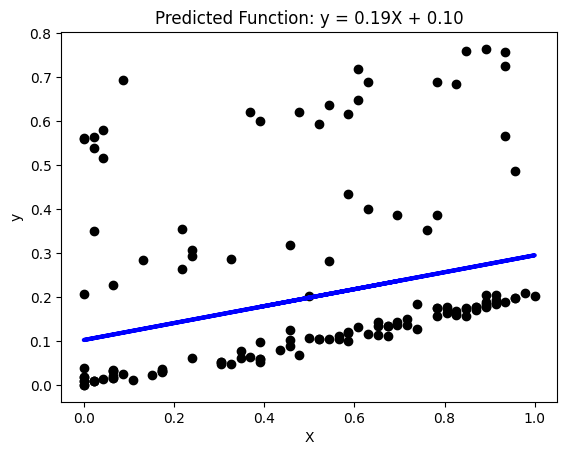

In [10]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (insurance_reg.coef_[0], insurance_reg.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')


Slope =  0.17708151
Intercept =  0.031015173
Root mean squared error = 0.1843
R-squared = 0.1017


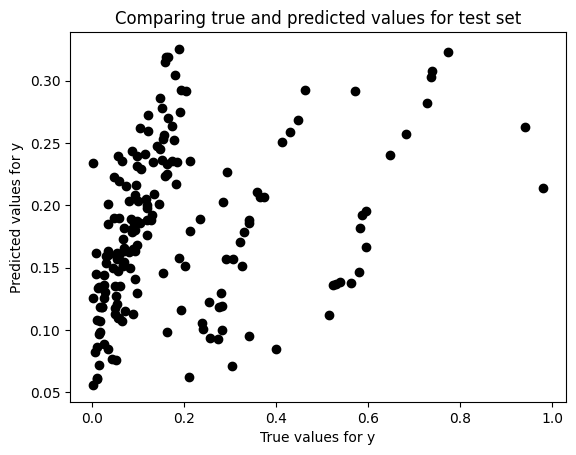

In [11]:
#Multiple Regression
normalize_numeric_minmax(df, "bmi")
normalize_numeric_minmax(df, "charges")
normalize_numeric_minmax(df, "age")
features = ['age','bmi']
X = df[features]
Y = df[['charges']]

numTrain = 20   # number of training instances
numTest = numInstances - numTrain

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = Y[:-numTest]
y_test = Y[-numTest:]

# Create linear regression object
ols = linear_model.LinearRegression()
model = ols.fit(X_train, y_train)

df2 = smf.ols(formula='charges ~ age + bmi', data=df)
results_formula = df2.fit()
results_formula.params


y_pred_test = model.predict(X_test)
model.predict(X_test)

x_surf, y_surf = np.meshgrid(np.linspace(X_test[X_test.columns[0]].min(),
X_test[X_test.columns[0]].max(), 100),np.linspace(X_test[X_test.columns[1]].min(), X_test[X_test.columns[1]].max(), 100))

onlyX = pd.DataFrame({'age': x_surf.ravel(), 'bmi': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)
fittedY=np.array(fittedY)
fig = plt.figure()


plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
y_train=np.array(y_pred_test)
print('Slope = ', model.coef_[0][0])
print('Intercept = ', model.intercept_[0])
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))


Text(0.55, 0.85, '$y = 0.18 x_1 - 0.03 $')

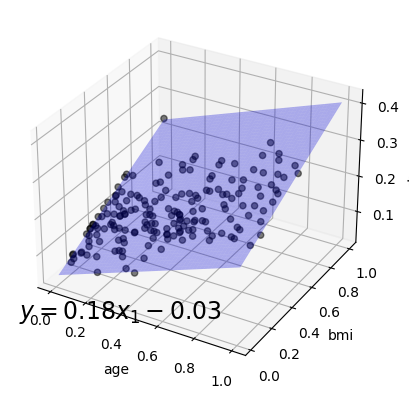

In [12]:
# Plot outputs

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_test[X_test.columns[0]],X_test[X_test.columns[1]],y_pred_test,c='black', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('age')
ax.set_ylabel('bmi')
ax.set_zlabel('charges')
ax.text(0.55, 0.85, 1, s = '$y = %.2f x_1 - %.2f $' % (model.coef_[0][0], abs(model.intercept_)), fontsize=17,transform=ax.transAxes)


In [13]:
#Linear
import pandas as pd 
import os
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
df = pd.read_csv('Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression (1).csv')
df
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace = True, drop = False)
df
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
#visualize the relationship
#sb.pairplot(df, x_vars = 'GRE Score', y_vars ='Chance of Admit', height =4, aspect = 2, kind ='reg')

FileNotFoundError: ignored

In [ ]:
normalize_numeric_minmax(df, "GRE Score")
normalize_numeric_minmax(df, "Chance of Admit")
X = df[['GRE Score']]
Y = df[['Chance of Admit']]

x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

KeyError: ignored

In [ ]:
#

In [ ]:
numInstances = 500
numTrain = 200
numTest = numInstances - numTrain
trainingData = df[:numTest]
testData = df[numTest:]
print (trainingData)
print (testData)

          age       bmi   charges
0    0.021739  0.321227  0.251611
1    0.000000  0.479150  0.009636
2    0.217391  0.458434  0.053115
3    0.326087  0.181464  0.333010
4    0.304348  0.347592  0.043816
..        ...       ...       ...
295  0.000000  0.189131  0.009301
296  0.021739  0.315846  0.242240
297  0.630435  0.254237  0.332918
298  0.282609  0.495830  0.600564
299  0.652174  0.347592  0.129734

[300 rows x 3 columns]
           age       bmi   charges
300   0.391304  0.311811  0.089784
301   0.760870  0.178908  0.379123
302   0.826087  0.579769  0.177875
303   0.217391  0.458434  0.051519
304   0.847826  0.592951  0.183952
...        ...       ...       ...
1333  0.695652  0.403820  0.151299
1334  0.000000  0.429379  0.017305
1335  0.000000  0.562012  0.008108
1336  0.065217  0.264730  0.014144
1337  0.934783  0.352704  0.447249

[1038 rows x 3 columns]


Using matplotlib backend: agg


Text(0, 0.5, 'y')

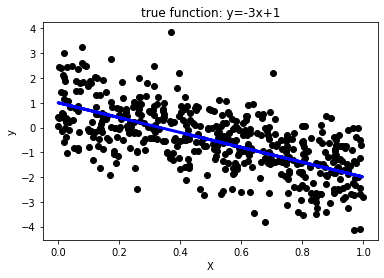

In [ ]:
%matplotlib
seed = 1
numInstances = 500
np.random.seed(seed)
X = np.random.rand(numInstances,1).reshape(-1,1)
y_true = -3*X +1
y = y_true + np.random.normal(size=numInstances).reshape(-1,1)

plt.scatter(X,y, color = 'black')
plt.plot(X, y_true, color = 'blue', linewidth = 3)
plt.title('true function: y=-3x+1')
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
numTrain = 250
numTest = numInstances - numTrain

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

In [ ]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)

Root mean squared error = 0.9651
R-squared = 0.4253
Slope =  -2.8228687945116144
Intercept =  0.9687038487123873


Text(0, 0.5, 'y')

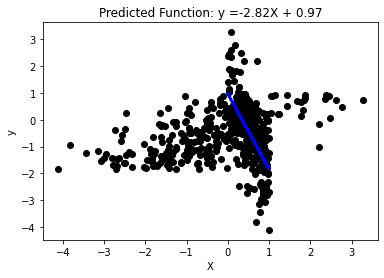

In [ ]:
plt.scatter(y_test,y_pred_test, color ='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))
print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])

plt.scatter(X_test,y_test, color = 'black')
plt.plot(X_test, y_pred_test, color = 'blue', linewidth=3)
titlestr = 'Predicted Function: y =%.2fX + %.2f' % (regr.coef_[0],regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
#Part B classification(decsision trees) NOT WORKING CODE YET


# Load libraries
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn import tree



# load dataset
df = pd.read_csv('Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv')
df = df.rename(columns={'Chance of Admit ':'AdmitChance'})
df = df.rename(columns={'TOEFL Score':'TOEFL Score'})
df = df.rename(columns={'GRE Score':'GREScore'})
df = df.rename(columns={'University Rating':'UniversityRating'})
df.head()








,Serial No.,GREScore,TOEFL Score,UniversityRating,SOP,LOR,CGPA,Research,AdmitChance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# New Section

In [ ]:
#DIFFERENT ATTEMPT FOR CLASSIFICATOIN 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
import pydotplus
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# first we discretize the last column "Chance of Admit" into three classes

df = pd.read_csv('Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv',na_values=['NA','?'])
# shuffle the dataset
#df = df.reindex(np.random.permutation(df.index))
#df.reset_index(inplace=True, drop=True)

df.loc[(df['Chance of Admit '] > 0) & (df['Chance of Admit '] <= 0.33), 'Chance of Admit '] = -1
df.loc[(df['Chance of Admit '] > 0.33) & (df['Chance of Admit '] <= 0.66), 'Chance of Admit '] = -2
df.loc[(df['Chance of Admit '] > 0.66) & (df['Chance of Admit '] <= 1), 'Chance of Admit '] = -3
df['Chance of Admit '] = df['Chance of Admit '].replace([-1],'low')
df['Chance of Admit '] = df['Chance of Admit '].replace([-2],'mid')
df['Chance of Admit '] = df['Chance of Admit '].replace([-3],'high')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,high
1,2,324,107,4,4.0,4.5,8.87,1,high
2,3,316,104,3,3.0,3.5,8.00,1,high
3,4,322,110,3,3.5,2.5,8.67,1,high
4,5,314,103,2,2.0,3.0,8.21,0,mid
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,high
496,497,337,117,5,5.0,5.0,9.87,1,high
497,498,330,120,5,4.5,5.0,9.56,1,high
498,499,312,103,4,4.0,5.0,8.43,0,high


In [ ]:
# split the data
numInstances = 501
numTrain = 100
numTest = numInstances - numTrain

trainingData = df[:numTest]
testData = df[numTest:]

# train with training data
Y = pd.DataFrame(trainingData, columns=['Chance of Admit '])
X = trainingData.drop(['Chance of Admit ', 'Serial No.'] ,axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

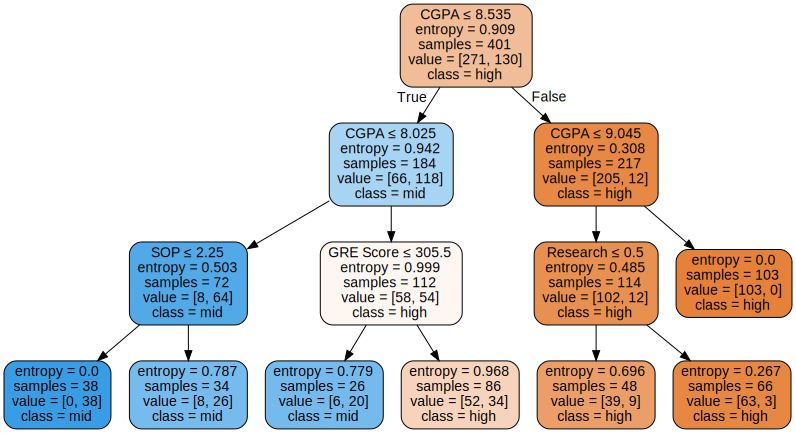

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['high','mid','low'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [ ]:
testY = pd.DataFrame(testData, columns=['Chance of Admit '])
testX = testData.drop(['Serial No.','Chance of Admit '],axis=1)

predY = clf.predict(testX)
testData.reset_index(inplace=True, drop=True)
predictions = pd.concat([testData['Chance of Admit '],pd.Series(predY,name='Predicted Class')], axis=1)
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))
predictions

Accuracy on test data is 0.86


,Chance of Admit,Predicted Class
0,mid,high
1,high,high
2,high,high
3,mid,mid
4,mid,mid
...,...,...
94,high,high
95,high,high
96,high,high
97,high,high
